# Data Cleaning:

### 1 - Collisions:

In [1]:
import pandas as pd
collisions = pd.read_csv("data/out_dataset/collisions.csv")

c:\users\antom\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
def cleaning(ds):
    dsc = ds.copy()
    print("\n\nDuplicates removal : \n")
    
    init_len = len(ds)
    dsc = dsc.drop_duplicates()
    print(f"> initial length : {init_len}, final length : {len(ds)} (when removing duplicates)")
    
    print("\n\nNan lines removal :\n")
    
    dsc = dsc.dropna(how='all')
    print(f"> initial length : {init_len}, final length : {len(ds)} (when removing nan lines)")
    
    return dsc

In [10]:
collisions = cleaning(collisions)



Duplicates removal : 

> initial length : 7493264, final length : 7493264 (when removing duplicates)


Nan lines removal :

> initial length : 7493264, final length : 7493264 (when removing nan lines)


In [11]:
collisions

,Unnamed: 0,case_id,collision_date,collision_time,collision_severity,type_of_collision,officer_id,process_date,ramp_intersection,tow_away,school_bus_related,pcf_id,road_state_id,location_id,hit_and_run
0,0,1.000000e+00,2002-01-18,15:30:00,property damage only,rear end,16418,2002-06-14,NaN,1.0,NaN,0,0,0,not hit and run
1,1,1.000000e+00,2002-01-18,15:30:00,property damage only,rear end,16418,2002-06-14,NaN,1.0,NaN,0,0,0,not hit and run
2,2,2.000000e+00,2002-02-13,19:30:00,property damage only,hit object,14360,2002-03-29,NaN,0.0,NaN,1,1,1,misdemeanor
3,3,3.000000e+00,2002-02-11,15:30:00,property damage only,hit object,16117,2003-07-15,NaN,0.0,NaN,2,0,2,misdemeanor
4,4,3.000000e+00,2002-02-11,15:30:00,property damage only,hit object,16117,2003-07-15,NaN,0.0,NaN,2,0,2,misdemeanor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493259,7493259,9.870011e+18,2001-12-26,10:20:00,other injury,head-on,9803,2002-03-29,8.0,1.0,NaN,7,0,685,not hit and run
7493260,7493260,9.870011e+18,2001-12-26,10:20:00,other injury,head-on,9803,2002-03-29,8.0,1.0,NaN,7,0,685,not hit and run
7493261,7493261,9.870011e+18,2001-12-28,21:00:00,property damage only,hit object,11458,2002-03-08,8.0,0.0,NaN,0,4,685,misdemeanor
7493262,7493262,9.870011e+18,2001-12-31,15:25:00,pain,sideswipe,8671,2002-04-26,7.0,1.0,NaN,30,0,959,not hit and run


In [17]:
def feature_analysis(ds):
    for feature in ds.columns:
        print(f'> feature : {feature}:')
        print(f'\t - spans {len(ds[feature].unique())} value for the {len(ds)} lines')
        print(f'\t - among which')
        for val in ds[feature].sample(min(max(len(ds[feature].unique()), 10), 30)).values:
            print('\t\t - ', val)
            
        print(f'\t - type : {type(ds[feature].sample(1).values[0])}' )

In [18]:
feature_analysis(collisions)

> feature : Unnamed: 0:
	 - spans 7493264 value for the 7493264 lines
	 - among which
		 -  2879946
		 -  6269938
		 -  2034791
		 -  1754540
		 -  952361
		 -  6894823
		 -  5144135
		 -  2228580
		 -  4743624
		 -  5014186
		 -  3711944
		 -  4550382
		 -  4460243
		 -  4560647
		 -  5383876
		 -  4202201
		 -  3936738
		 -  1191331
		 -  6003106
		 -  2285939
		 -  2322789
		 -  5277388
		 -  7328305
		 -  22365
		 -  2000986
		 -  565668
		 -  7154869
		 -  4293638
		 -  4050070
		 -  6004570
	 - type : <class 'numpy.int64'>
> feature : case_id:
	 - spans 3673433 value for the 7493264 lines
	 - among which
		 -  3460118.0
		 -  1224619.0
		 -  2362489.0
		 -  2030580.0
		 -  600333.0
		 -  2258071.0
		 -  3028036.0
		 -  2679472.0
		 -  9.760010414231015e+18
		 -  2597400.0
		 -  3.0090107270940017e+18
		 -  400264.0
		 -  3326602.0
		 -  1030236.0
		 -  1572278.0
		 -  1081777.0
		 -  9.590010602234515e+18
		 -  935655.0
		 -  498450.0
		 -  1380022.0
		 -  2202538.0
		 -  9.68501

In [21]:
print(len(collisions.case_id.dropna()) == len(collisions.case_id))
print(len(collisions.case_id.unique()) == len(collisions.case_id))

## maybe we could replace case_id by hand !!
del collisions

True
False


In [23]:
parties = pd.read_csv("data/out_dataset/parties.csv")
parties = cleaning(parties)
feature_analysis(parties)



Duplicates removal : 

> initial length : 7286606, final length : 7286606 (when removing duplicates)


Nan lines removal :

> initial length : 7286606, final length : 7286606 (when removing nan lines)
> feature : Unnamed: 0:
	 - spans 7286606 value for the 7286606 lines
	 - among which
		 -  4688607
		 -  7145434
		 -  3906213
		 -  5036266
		 -  6413400
		 -  4627018
		 -  5408328
		 -  2542070
		 -  4399402
		 -  2194770
		 -  5709801
		 -  6738408
		 -  1980341
		 -  1898512
		 -  4357303
		 -  2529437
		 -  578342
		 -  722683
		 -  4568566
		 -  6159443
		 -  6001901
		 -  1361049
		 -  2872218
		 -  5519007
		 -  7194492
		 -  947600
		 -  7175160
		 -  5671346
		 -  4221801
		 -  6670106
	 - type : <class 'numpy.int64'>
> feature : id:
	 - spans 7286606 value for the 7286606 lines
	 - among which
		 -  2023989
		 -  455153
		 -  5278
		 -  1290423
		 -  3873353
		 -  4246306
		 -  3060576
		 -  3061994
		 -  80338
		 -  64861
		 -  2271903
		 -  3323517
		 -  5461729
		 -  371

MemoryError: Unable to allocate 70.1 PiB for an array with shape (9870011231152508,) and data type float64

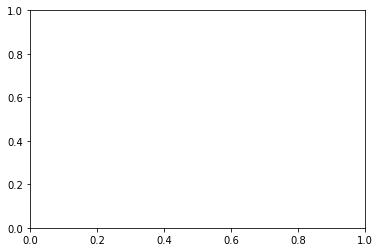

In [28]:
### investigation of case_id

import seaborn as sns

sns.histplot(data=parties, x='case_id', binwidth=1000)